# SEM image processing - 60nm AuNPs

### Objective

Use pyparty to recognize the particle distribution pattern of the 60nm AuNPs SEM images.

### Environment Setup

Configure notebook style (see NBCONFIG.ipynb), add imports and paths.  The **%run** magic used below <font color='red'>**requires IPython 2.0 or higher.**</font>

In [1]:
%run NBCONFIG.ipynb

Populating the interactive namespace from numpy and matplotlib


In [2]:
from skimage.io import imread
from pyparty import Canvas, MultiCanvas
from pyparty.plots import splot, showim 
import numpy as np

Use Ilastik to preprocess the SEM images, generating labeled images. Then apply MultiCanvas to separate out the species.

The SEM image analyzed in this notebook is of Fiber3 from Aug17, with 50k magnification and high resolution.

### Cropped Image

Selected a part of this image and performed object classification in Ilastik. The prediction export is saved as aunp60nmcropped.tif, which will be imported and analyzed by pyparty.

Surface coverage = 0.103003


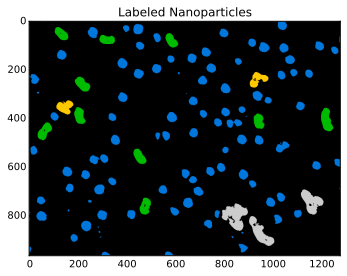

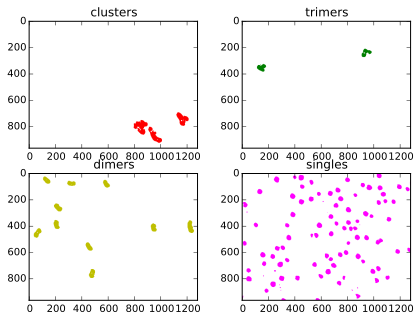

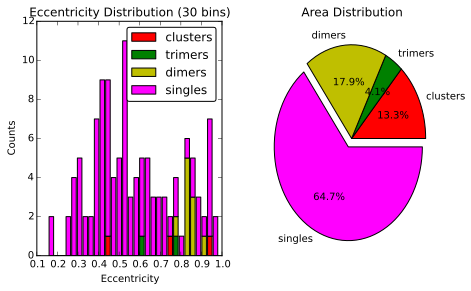

In [18]:
aunp1 = imread('aunp60nmcropped.tif').astype(np.float32)
NANOLABELS1 = aunp1
NAMES = ('clusters','trimers','dimers','singles' )
showim(NANOLABELS1, 'spectral', title='Labeled Nanoparticles') 

coverage = float(sum(aunp1>0))/float(sum(aunp1>0)+sum(aunp1==0))
print "Surface coverage = %f" %coverage

mc1 = MultiCanvas.from_labeled(aunp1, *NAMES)
mc1.set_colors('r', 'g', 'y', 'magenta')
mc1.show(names = True, ncols=2, figsize=(7,5))

ax1, ax2 = splot(1,2)
mc1.hist(ax1, attr='eccentricity', bins=30)
mc1.pie(ax2, attr='area', explode=(0,0,0, 0.1));

### Entire Image

Trained object classification on original size image in Ilastik. The prediction export is saved as aunp60nm_2.tif, which will be imported and analyzed by pyparty.

Theoretically, we can train the cropped image and apply the labels directly on the entire image based on the batch processing feature. But currently, Ilastik does not accept these two images as imported data for batch processing. **Need to figure out the batch processing.**

Surface coverage = 0.093989


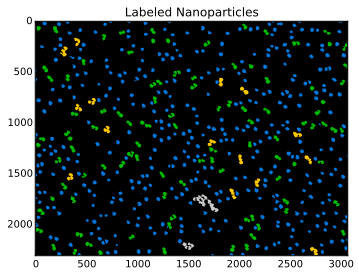

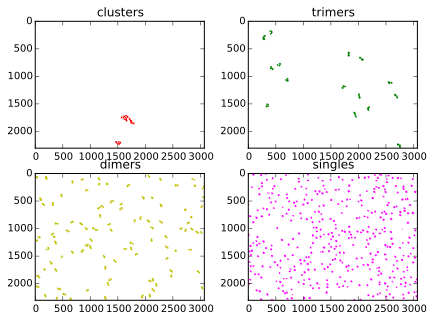

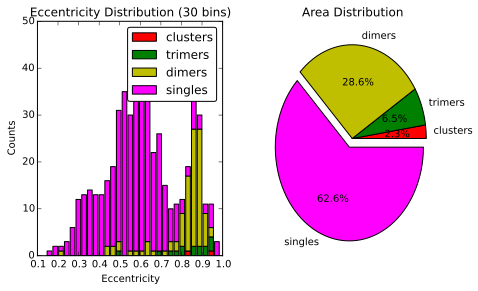

In [19]:
aunp = imread('AuNP60nm_2.tif').astype(np.float32)
NANOLABELS = aunp
NAMES = ('clusters','trimers','dimers','singles' )
showim(NANOLABELS, 'spectral', title='Labeled Nanoparticles') 

coverage = float(sum(aunp>0))/float(sum(aunp>0)+sum(aunp==0))
print "Surface coverage = %f" %coverage

mc = MultiCanvas.from_labeled(aunp, *NAMES)
mc.set_colors('r', 'g', 'y', 'magenta')
mc.show(names = True, ncols=2, figsize=(7,5))

ax1, ax2 = splot(1,2)
mc.hist(ax1, attr='eccentricity', bins=30)
mc.pie(ax2, attr='area', explode=(0,0,0, 0.1));